## Assignment 1: Second Datasets HRTU 2

In [112]:
import numpy as np
import pandas as pd
import time
# datasets
htru = pd.read_csv('HTRU_2.csv', header=None)
htru.columns = ['mean_intregrated', 'sd_integrated', 'kurtosis_integrated', 'skew_integrated','mean_dmsnr', 'sd_dmsnr', 'kurtossi_dmsnr', 'skew_dmsnr','labels']

In [501]:
htru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   mean_intregrated     17898 non-null  float64
 1   sd_integrated        17898 non-null  float64
 2   kurtosis_integrated  17898 non-null  float64
 3   skew_integrated      17898 non-null  float64
 4   mean_dmsnr           17898 non-null  float64
 5   sd_dmsnr             17898 non-null  float64
 6   kurtossi_dmsnr       17898 non-null  float64
 7   skew_dmsnr           17898 non-null  float64
 8   labels               17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [115]:
htru['labels'].value_counts()

0    16259
1     1639
Name: labels, dtype: int64

### Preprocessing

In [117]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder

scaling = StandardScaler()
hrtu_scaled = scaling.fit_transform(htru.drop('labels', axis=1))

### Numerical (just min max scaler sth sth )


In [424]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

def get_all_metrics_score(predict_value, real_value):
    acc_scr = accuracy_score(predict_value, real_value)
    pre_scr = precision_score(predict_value, real_value)
    recall_scr = recall_score(predict_value, real_value)
    roc_scr = roc_auc_score(predict_value, real_value)
    f1_scr = f1_score(predict_value, real_value)
    print("SCORE")
    print("Accuracy:", acc_scr)
    print("Precision:", pre_scr)
    print("Recall:", recall_scr)
    print("F1 Score:", f1_scr)
    print("ROC AUC:", roc_scr)
#     return {'accuracy':acc_scr, 'precision':pre_scr, 'recall':recall_scr, 'f1_score':f1_scr, 'roc':roc_scr}

def plot_learning_curve(model, X, y, title='Learning Curve, for Training Sets and Validation Sets'):
    
    train_sizes, train_scores, valid_scores = learning_curve(model, X, y, 
                                                             train_sizes=np.linspace(0.1, 1.0, 10),cv=5, scoring='accuracy')
    mean_train_scores = np.mean(train_scores,axis=1)
    mean_valid_scores = np.mean(valid_scores,axis=1)
    fig, ax = plt.subplots()
    ax.plot(train_sizes, mean_train_scores, "b-", label='Training Sets')
    ax.plot(train_sizes, mean_valid_scores, "r-", label='Validation Sets')
    ax.set_xlabel('Training Size')
    ax.set_ylabel('Mean Accuracy')
    ax.set_title(title)
    ax.legend()
    plt.show(fig)

### Combine

In [123]:
# features = np.concatenate((stroke_data_scaled,stroke_data_catg_onehot.toarray()),axis=1)
features = hrtu_scaled
labels = htru['labels']

Start Preping some normal ML models

In [286]:
# from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33, random_state=42)
X_train_real, X_validation, y_train_real, y_validation = train_test_split(X_train, y_train, test_size=0.3, random_state=42)
random_state=42

### Decision Tree

In [427]:
# Train test split
from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33, random_state=42)

param_grid = [
   {'ccp_alpha':[0, 0.0005, 0.001, 0.0015 ,0.002 0.01, 0.02],
    'criterion':['gini', 'entropy']
   }
]
# Try GRID SEARCH
tree_clf = DecisionTreeClassifier(random_state=random_state)
tree_grid_clf = GridSearchCV(tree_clf, param_grid, cv=5,
                            scoring='accuracy', return_train_score=True)
tree_grid_clf.fit(X_train, y_train)

#  Record fit time
start_time = time.time()
best_tree = tree_grid_clf.best_estimator_
best_tree.fit(X_train, y_train)
stop_time = time.time()
print(f"Fit time: {stop_time - start_time} seconds")
pred_tree = best_tree.predict(X_test)
print("Train Score:", best_tree.score(X_train, y_train))
print("Performance:")
get_all_metrics_score(pred_tree, y_test)

Fit time: 0.0937802791595459 seconds
Train Score: 0.9820698857476441
Performance:
SCORE
Accuracy: 0.9790079566615879
Precision: 0.8288973384030418
Recall: 0.9276595744680851
F1 Score: 0.8755020080321284
ROC AUC: 0.9555531640962829


In [429]:
best_tree

DecisionTreeClassifier(ccp_alpha=0.0005, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

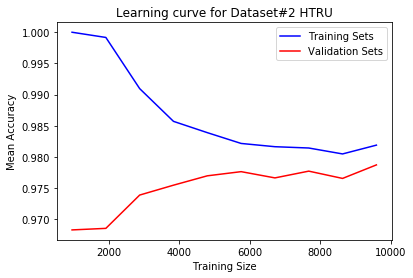

In [425]:
# Plot Learning curves
plot_learning_curve(best_tree, X_train, y_train, 'Learning curve for Dataset#2 HTRU')

In [196]:
# Unprune tree
unpruned_tree = DecisionTreeClassifier(ccp_alpha=0, random_state=random_state)
unpruned_tree.fit(X_train, y_train)
pred_unpruned_tree = unpruned_tree.predict(X_test)
get_all_metrics_score(pred_unpruned_tree, y_test)
print('Train Accuracy', unpruned_tree.score(X_train, y_train))

SCORE
Accuracy: 0.9705434230573895
Precision: 0.8288973384030418
Recall: 0.8384615384615385
F1 Score: 0.8336520076481836
ROC AUC: 0.9108773257557369
Train Accuracy 1.0


In [197]:
# Optimal Prune tree
pred_best_tree = best_tree.predict(X_test)
get_all_metrics_score(pred_best_tree, y_test)
print('Train Accuracy', best_tree.score(X_train, y_train))

SCORE
Accuracy: 0.9790079566615879
Precision: 0.8288973384030418
Recall: 0.9276595744680851
F1 Score: 0.8755020080321284
ROC AUC: 0.9555531640962829
Train Accuracy 0.9820698857476441


In [284]:
# Extreme Prune Tree
# Unprune tree
pruned_tree = DecisionTreeClassifier(ccp_alpha=0.01, random_state=random_state)
pruned_tree.fit(X_train, y_train)
pred_extreme_pruned_tree = pruned_tree.predict(X_test)
get_all_metrics_score(pred_extreme_pruned_tree, y_test)
print('Train Accuracy', pruned_tree.score(X_train, y_train))

SCORE
Accuracy: 0.9773150499407482
Precision: 0.811787072243346
Recall: 0.9242424242424242
F1 Score: 0.8643724696356275
ROC AUC: 0.953030303030303
Train Accuracy 0.9779834876157117


### Pruning Graph

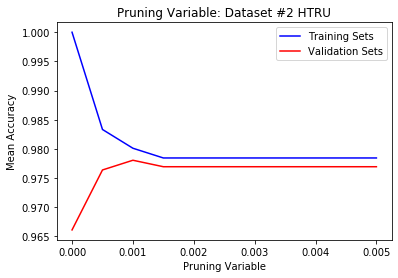

In [430]:
dtree_clfs = []
for i in np.linspace(0,  0.005, 11 ):
    dtree = DecisionTreeClassifier(ccp_alpha=i, random_state=random_state)
    dtree.fit(X_train_real, y_train_real)
    dtree_clfs.append(dtree)

train_score = [i.score(X_train_real, y_train_real) for i in dtree_clfs]
test_score = [i.score(X_validation, y_validation) for i in dtree_clfs]

fig, ax = plt.subplots()
ax.plot(np.linspace(0,  0.005, 11 ), train_score, "b-", label='Training Sets')
ax.plot(np.linspace(0,  0.005, 11 ), test_score, "r-", label='Validation Sets')
ax.set_xlabel('Pruning Variable')
ax.set_ylabel('Mean Accuracy')
ax.set_title('Pruning Variable: Dataset #2 HTRU')
ax.legend()
plt.show(fig)

###  KNN

In [512]:
# n = 5
knn_clf = KNeighborsClassifier()
param_grid = [
   {'n_neighbors':[10, 11, 12, 13, 14, 15, 16, 17, 18],
    'p':[1 , 2]}
]
knn_gird_search = GridSearchCV(knn_clf, param_grid, cv=5, scoring='accuracy', return_train_score=True)
knn_gird_search.fit(X_train, y_train)
knn_best_model = knn_gird_search.best_estimator_

start_time = time.time()
knn_best_model.fit(X_train, y_train)
stop_time = time.time()
print(f"Fit time: {stop_time - start_time} seconds")
pred_knn = knn_best_model.predict(X_test)
print("Train Score:", knn_best_model.score(X_train, y_train))
print("Performance:")
get_all_metrics_score(pred_knn, y_test)
# Retrain after plotting KNN variables!!, adding more K

Fit time: 0.03690218925476074 seconds
Train Score: 0.979151029939121
Performance:
SCORE
Accuracy: 0.9795158286778398
Precision: 0.8269961977186312
Recall: 0.9354838709677419
F1 Score: 0.8779011099899091
ROC AUC: 0.9593810387547272


In [513]:
knn_best_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

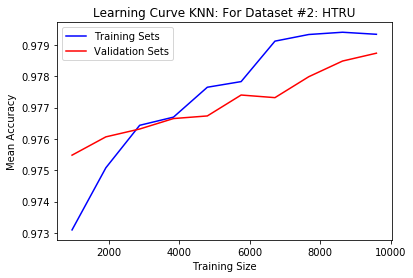

In [514]:
plot_learning_curve(knn_best_model, X_train, y_train, 'Learning Curve KNN: For Dataset #2: HTRU')

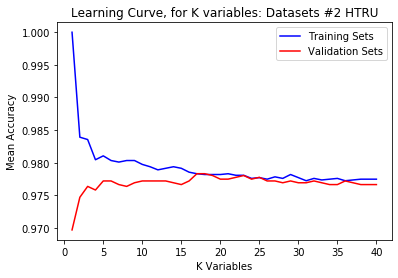

In [440]:
# K Learning Graph
knn_clfs = []
for i in range(1, 41):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_real, y_train_real)
    knn_clfs.append(knn)
    
train_score = [i.score(X_train_real, y_train_real) for i in knn_clfs]
test_score = [i.score(X_validation, y_validation) for i in knn_clfs]

fig, ax = plt.subplots()
ax.plot(range(1, 41) , train_score, "b-", label='Training Sets')
ax.plot(range(1, 41) , test_score, "r-", label='Validation Sets')
ax.set_xlabel('K Variables')
ax.set_ylabel('Mean Accuracy')
ax.set_title('Learning Curve, for K variables: Datasets #2 HTRU')
ax.legend()
plt.show(fig)

In [521]:
# Get example score for K = 1, 11 (Optimal) and 40
knn_clfs_n = []
for i in [1, 13, 40]:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_real, y_train_real)
    knn_clfs_n.append(knn)
    
train_score_n = [i.score(X_train_real, y_train_real) for i in knn_clfs_n]
test_score_n = [i.score(X_validation, y_validation) for i in knn_clfs_n]
print("Train Score", train_score_n)
print("Test Score", test_score_n)

Train Score [1.0, 0.9791492910758965, 0.9774812343619683]
Test Score [0.9697053918843802, 0.9772095608671484, 0.9766536964980544]


### Boosting

In [442]:
param_grid =  [{'base_estimator__ccp_alpha':[0, 0.0005,0.001, 0.0015 ,0.002, 0.01, 0.02]}]

dtree = DecisionTreeClassifier()

ada_clf =  AdaBoostClassifier(DecisionTreeClassifier(),
                          n_estimators=300, random_state=random_state)

ada_grid_clf = GridSearchCV(ada_clf, param_grid, cv=5,
                            scoring='accuracy', return_train_score=True)
ada_grid_clf.fit(X_train, y_train)
ada_grid_best = ada_grid_clf.best_estimator_

start_time = time.time()
ada_grid_best.fit(X_train, y_train)
stop_time = time.time()
print(f"Fit time: {stop_time - start_time} seconds")
pred_ada = ada_grid_best.predict(X_test)
print("Train Score:", ada_grid_best.score(X_train, y_train))
print("Performance:")
get_all_metrics_score(pred_ada, y_test)

Fit time: 34.915464639663696 seconds
Train Score: 1.0
Performance:
SCORE
Accuracy: 0.9795158286778398
Precision: 0.8384030418250951
Recall: 0.9245283018867925
F1 Score: 0.8793619142572283
ROC AUC: 0.9544372632822544


In [443]:
ada_grid_best

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0015,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                    

In [340]:
print(get_all_metrics_score(pred_ada, y_test))
print('Train Score:',ada_grid_best.score(X_train, y_train))

SCORE
Accuracy: 0.9800237006940917
Precision: 0.8479087452471483
Recall: 0.9214876033057852
F1 Score: 0.8831683168316831
ROC AUC: 0.9533678105040821
{'accuracy': 0.9800237006940917, 'precision': 0.8479087452471483, 'recall': 0.9214876033057852, 'f1_score': 0.8831683168316831, 'roc': 0.9533678105040821}
Train Score: 1.0


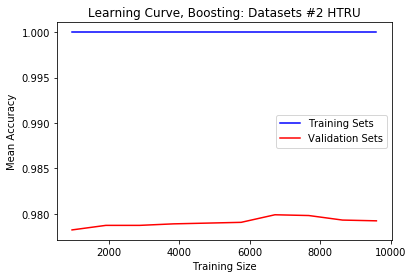

In [444]:
plot_learning_curve(ada_grid_best, X_train, y_train, 'Learning Curve, Boosting: Datasets #2 HTRU')

In [339]:
# NO prune
dtree = DecisionTreeClassifier(ccp_alpha=0)

ada_clf =  AdaBoostClassifier(dtree,
                          n_estimators=300, random_state=random_state)

ada_clf.fit(X_train, y_train)
# ada_grid_best = ada_grid_clf.best_estimator_
pred_ada_noprune = ada_clf.predict(X_test)
print(get_all_metrics_score(pred_ada_noprune, y_test))
print(ada_clf.score(X_train, y_train))

SCORE
Accuracy: 0.9690198070086338
Precision: 0.8326996197718631
Recall: 0.8217636022514071
F1 Score: 0.8271954674220964
ROC AUC: 0.9026942313452794
{'accuracy': 0.9690198070086338, 'precision': 0.8326996197718631, 'recall': 0.8217636022514071, 'f1_score': 0.8271954674220964, 'roc': 0.9026942313452794}
1.0


In [338]:
# Extreme prune
dtree = DecisionTreeClassifier(ccp_alpha=0.01)

ada_clf =  AdaBoostClassifier(dtree,
                          n_estimators=300, random_state=random_state)

ada_clf.fit(X_train, y_train)
# ada_grid_best = ada_grid_clf.best_estimator_
pred_ada_noprune = ada_clf.predict(X_test)
get_all_metrics_score(pred_ada_noprune, y_test)
# print(ada_clf.score(X_train, y_train))
print('Train Score', ada_clf.score(X_train, y_train))

SCORE
Accuracy: 0.9747756898594887
Precision: 0.7718631178707225
Recall: 0.9333333333333333
F1 Score: 0.8449531737773154
ROC AUC: 0.9557017543859649
0.9771495288132767
Train Score 0.9771495288132767


In [337]:
# Extra Extreme prune
dtree = DecisionTreeClassifier(ccp_alpha=0.02)

ada_clf =  AdaBoostClassifier(dtree,
                          n_estimators=300, random_state=random_state)

ada_clf.fit(X_train, y_train)
# ada_grid_best = ada_grid_clf.best_estimator_
pred_ada_noprune = ada_clf.predict(X_test)
print('Train Score', ada_clf.score(X_train, y_train))
get_all_metrics_score(pred_ada_noprune, y_test)

SCORE
Accuracy: 0.9773150499407482
Precision: 0.811787072243346
Recall: 0.9242424242424242
F1 Score: 0.8643724696356275
ROC AUC: 0.953030303030303
{'accuracy': 0.9773150499407482, 'precision': 0.811787072243346, 'recall': 0.9242424242424242, 'f1_score': 0.8643724696356275, 'roc': 0.953030303030303}
Train Score 0.9779834876157117


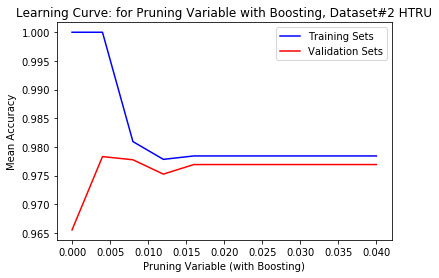

In [336]:
# Pruning Graph for Boosting!!
boosting_clfs = []
prune_size = np.linspace(0,  0.04, 11 )
for i in prune_size:
    dtree = DecisionTreeClassifier(ccp_alpha=i)
    ada_clf = AdaBoostClassifier(dtree,
                          n_estimators=300, random_state=random_state)
    ada_clf.fit(X_train_real, y_train_real)
    boosting_clfs.append(ada_clf)

train_score_ada = [i.score(X_train_real, y_train_real) for i in boosting_clfs]
test_score_ada = [i.score(X_validation, y_validation) for i in boosting_clfs]

fig, ax = plt.subplots()
ax.plot(prune_size, train_score_ada, "b-", label='Training Sets')
ax.plot(prune_size, test_score_ada, "r-", label='Validation Sets')
ax.set_xlabel('Pruning Variable (with Boosting)')
ax.set_ylabel('Mean Accuracy')
ax.set_title('Learning Curve: for Pruning Variable with Boosting, Dataset#2 HTRU')
ax.legend()
plt.show(fig)

### SVM

In [477]:
param_grid = [{
    'kernel': ['rbf', 'linear','poly','sigmoid'],
    'C': [ 0.001, 0.01, 0.1, 1, 10, 100]
}]

svm_clf = SVC()
# svm_clf = SVC(C=1)
svm_grid_clf = GridSearchCV(svm_clf, param_grid, cv=5,
                            scoring='accuracy', return_train_score=True)

svm_grid_clf.fit(X_train, y_train)
svm_grid_best = svm_grid_clf.best_estimator_

start_time = time.time()
svm_grid_best.fit(X_train, y_train)
stop_time = time.time()
print(f"Fit time: {stop_time - start_time} seconds")
pred_svm = svm_grid_best.predict(X_test)
print("Train Score:", svm_grid_best.score(X_train, y_train))
print("Performance:")
get_all_metrics_score(pred_svm, y_test)

Fit time: 4.497974395751953 seconds
Train Score: 0.9799849887415562
Performance:
SCORE
Accuracy: 0.978500084645336
Precision: 0.8098859315589354
Recall: 0.9403973509933775
F1 Score: 0.8702757916241063
ROC AUC: 0.9610310920716795


In [495]:
svm_grid_best

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

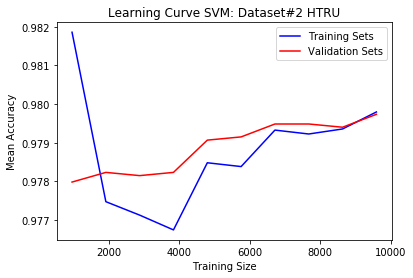

In [447]:
plot_learning_curve(svm_grid_best, X_train, y_train, "Learning Curve SVM: Dataset#2 HTRU")

In [484]:
svm_clfs = []
kernel_list = ['rbf', 'linear','poly','sigmoid']
# using C from best params
for i in kernel_list:
    svm_clf = SVC(C=svm_grid_best.C, kernel=i)
    svm_clf.fit(X_train_real, y_train_real)
    svm_clfs.append(svm_clf)
    print("===================")
    print(f"Kernel {i}")
    print(f"Train Score {svm_clf.score(X_train_real, y_train_real)}")
    print(f"Validation Score {svm_clf.score(X_validation, y_validation)}")
    

Kernel rbf
Train Score 0.9841534612176814
Validation Score 0.9780433574207893
Kernel linear
Train Score 0.979864172524723
Validation Score 0.9799888827126181
Kernel poly
Train Score 0.981174788514238
Validation Score 0.9774874930516954
Kernel sigmoid
Train Score 0.8665554628857381
Validation Score 0.8749305169538633


In [497]:
# how about we varying C? => what will happen?
c_values = [ 0.001, 0.01, 0.1, 1, 10, 100]
svm_clfs = []
for i in c_values:
    svm = SVC(C=i,kernel='linear')
    svm.fit(X_train_real, y_train_real)
    svm_clfs.append(svm)

train_score = [i.score(X_train_real, y_train_real) for i in svm_clfs]
test_score = [i.score(X_validation, y_validation) for i in svm_clfs]


In [498]:
pd.DataFrame(zip(c_values, train_score, test_score), columns=['C', 'Train Score', 'Validation Score'])

,C,Train Score,Validation Score
0,0.001,0.967592,0.970817
1,0.010,0.974503,0.975820
2,0.100,0.978792,0.978043
3,1.000,0.979864,0.979711
4,10.000,0.979864,0.979989
5,100.000,0.979864,0.979989


### Neural Networks

In [462]:
from sklearn.neural_network import MLPClassifier

param_grid = [{
    'activation': ['relu', 'logistic', 'tanh'],
    'hidden_layer_sizes':[(10,), (10,2), (10,4), (10, 8), (10, 16), (10, 32)]
}]


ann_clf = MLPClassifier(solver='adam', max_iter=300, random_state=random_state)
ann_grid_clf = GridSearchCV(ann_clf, param_grid, cv=5,
                           scoring='accuracy', return_train_score=True)

ann_grid_clf.fit(X_train, y_train)
ann_grid_clf_best = ann_grid_clf.best_estimator_

start_time = time.time()
ann_grid_clf_best.fit(X_train, y_train)
stop_time = time.time()
print(f"Fit time: {stop_time - start_time} seconds")
pred_ann = ann_grid_clf_best.predict(X_test)
print("Train Score:", ann_grid_clf_best.score(X_train, y_train))
print("Performance:")
get_all_metrics_score(pred_ann, y_test)

C:\Users\Por\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Fit time: 5.370636224746704 seconds
Train Score: 0.9805687599032608
Performance:
SCORE
Accuracy: 0.9781615033011681
Precision: 0.8307984790874525
Recall: 0.9161425576519916
F1 Score: 0.8713858424725823
ROC AUC: 0.9498760670396238


In [481]:
ann_grid_clf_best

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 32), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=300,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

C:\Users\Por\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Por\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Por\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Por\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum ite

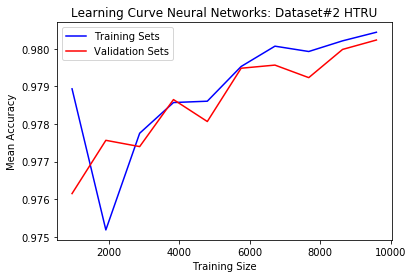

In [464]:
plot_learning_curve(ann_grid_clf_best, X_train, y_train, "Learning Curve Neural Networks: Dataset#2 HTRU")

In [465]:
ann_clfs = []
activation_list = ['relu', 'logistic', 'tanh']
# using C from best params
for i in activation_list:
    ann_clf = MLPClassifier(activation=i, hidden_layer_sizes=ann_grid_clf_best.hidden_layer_sizes, solver='adam', max_iter=300, random_state=random_state)
    ann_clf.fit(X_train_real, y_train_real)
    ann_clfs.append(ann_clf)
    print("===================")
    print(f"Activation Function: {i}")
    print(f"Train Score {ann_clf.score(X_train_real, y_train_real)}")
    print(f"Validation Score {ann_clf.score(X_validation, y_validation)}")
    

Activation Function: relu
Train Score 0.9815322292386512
Validation Score 0.9788771539744302
Activation Function: logistic
Train Score 0.9804599070654116
Validation Score 0.980544747081712
Activation Function: tanh
Train Score 0.979864172524723
Validation Score 0.9794330183435241


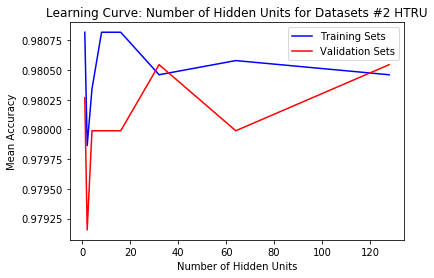

In [482]:
# For number of hidden units in the second layers
acc_train = []
acc_test = []
# clfs = []
hidden_units = [2**n for n in range(0, 8, 1)]
# hidden_units =
for i in hidden_units:
    if i == 0:
        sizes = (10,)
    else:
        sizes = (10,i)
    clf = MLPClassifier(activation='logistic', hidden_layer_sizes=sizes,max_iter=300, solver='adam', random_state=random_state)
    clf.fit(X_train_real, y_train_real)
    y_pred = clf.predict(X_validation)
    test_score = accuracy_score(y_validation, y_pred)
    acc_train.append(clf.score(X_train_real, y_train_real))
    acc_test.append(test_score)
    
fig, ax = plt.subplots()
ax.plot(list(hidden_units), acc_train, "b-", label='Training Sets')
ax.plot(list(hidden_units), acc_test, "r-", label='Validation Sets')
ax.set_xlabel('Number of Hidden Units')
ax.set_ylabel('Mean Accuracy')
ax.set_title('Learning Curve: Number of Hidden Units for Datasets #2 HTRU')
ax.legend()
plt.show(fig)

C:\Users\Por\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


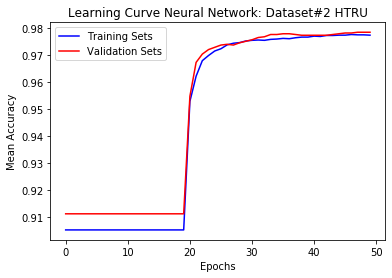

In [526]:
clf = MLPClassifier(activation=ann_grid_clf_best.activation, hidden_layer_sizes=ann_grid_clf_best.hidden_layer_sizes, learning_rate_init=0.001, random_state=1, max_iter=1, solver='adam', warm_start=True)
acc_train = []
acc_test = []
# clfs = []
times_range = range(50)
for i in times_range:
    clf.fit(X_train_real, y_train_real)
    y_pred = clf.predict(X_validation)
    test_score = accuracy_score(y_validation, y_pred)
    acc_train.append(clf.score(X_train_real, y_train_real))
    acc_test.append(test_score)
    
fig, ax = plt.subplots()
ax.plot( list(times_range), acc_train, "b-", label='Training Sets')
ax.plot(list(times_range), acc_test, "r-", label='Validation Sets')
ax.set_xlabel('Epochs')
ax.set_ylabel('Mean Accuracy')
ax.set_title('Learning Curve Neural Network: Dataset#2 HTRU')
ax.legend()
plt.show(fig)